In [1]:
import numpy as np
import time
from scipy import misc, ndimage
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
from data_loader import *
from data_visualizer import *

np.random.seed(2018)

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, f1_score
from keras.models import load_model
from keras.utils import plot_model
from keras.optimizers import SGD, Adam
from keras.callbacks import CSVLogger, ReduceLROnPlateau
from keras_sequential_ascii import keras2ascii
from sklearn.metrics import accuracy_score, f1_score

Using TensorFlow backend.


In [4]:
#inicializace dat
x_train, y_train = load_data()
x_test, y_test = load_test_data()
print(x_train.shape)
print(x_test.shape)

(6625, 64, 64, 3)
(700, 64, 64, 3)


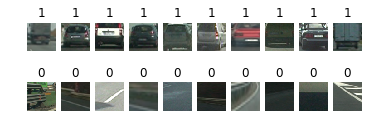

In [3]:
#zobrazení příkladů trénovacího souboru
visualize_examples(x_train, y_train, 10)

In [9]:
#změna matice
x_train, x_test = change_matrix(x_train, x_test)

Dimenze trénovacího setu X:(6625, 12288)
Dimenze trénovacího setu Y:(6625,)
Dimenze testovacího setu X:(700, 12288)
Dimenze testovacího setu Y:(700,)


In [12]:
# vytvoření modelu neuronové sítě
def train_model(x_train, y_train, epochs, batch_size, optimizer):
    
    #inicializace parametrů
    epochs_n = epochs
    batch_size_n = batch_size 
    unit_in_layer = 200
    
    #vytvoření modelu s pěti vrstvami a dropoutem
    model = Sequential()
    model.add(Dense(units=400, activation = "relu", input_dim = x_train.shape[1]))
    Dropout(0.2)
    model.add(Dense(units=200,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=100,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=50,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=1,activation="sigmoid"))

    #nastavení optimizeru
    if (optimizer == 'sgd'):
        sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True)
        model.compile(optimizer = sgd, loss = "binary_crossentropy", metrics = ["accuracy"])
        
    elif (optimizer == 'adam'):
        adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ["accuracy"])

    # Train the model
    start = time.time()
     # vytvoření logu trénování
    csv_logger = CSVLogger('nn_deep_5_adam_pyramid_200e.log')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    # trénování modelu model.fit()
    history = model.fit(x_train, y_train, validation_split=0.2,  epochs = epochs_n, batch_size = batch_size_n, verbose = 1, callbacks=[csv_logger, reduce_lr])
    end = time.time() 
    
    # vytiskne přehled modelu
    print("Model took %0.2f seconds to train"%(end - start))
    print(model.summary())
    keras2ascii(model)
    print_graphs(history)
    
    #uložení modelu ve formátu .h5
    model.save(r'C:\Users\Petr\Desktop\Bakalářská práce\Neural_networks\deep_nn\nn_deep_5_adam_pyramid_200e.h5')
    
    return history, model

Train on 5304 samples, validate on 1326 samples
Epoch 1/200
5304/5304 [==============================] - 20s 4ms/step - loss: 0.4349 - acc: 0.8118 - val_loss: 0.3065 - val_acc: 0.8959
Epoch 2/200
5304/5304 [==============================] - 19s 4ms/step - loss: 0.2594 - acc: 0.9048 - val_loss: 0.2107 - val_acc: 0.9261
Epoch 3/200
5304/5304 [==============================] - 19s 4ms/step - loss: 0.2407 - acc: 0.9071 - val_loss: 0.2245 - val_acc: 0.9125
Epoch 4/200
5304/5304 [==============================] - 19s 4ms/step - loss: 0.1792 - acc: 0.9333 - val_loss: 0.1490 - val_acc: 0.9427
Epoch 5/200
5304/5304 [==============================] - 19s 4ms/step - loss: 0.1797 - acc: 0.9329 - val_loss: 0.1472 - val_acc: 0.9457
Epoch 6/200
5304/5304 [==============================] - 23s 4ms/step - loss: 0.1408 - acc: 0.9514 - val_loss: 0.1302 - val_acc: 0.9502
Epoch 7/200
5304/5304 [==============================] - 24s 5ms/step - loss: 0.1693 - acc: 0.9395 - val_loss: 0.1495 - val_acc: 0.9480


Epoch 120/200
5304/5304 [==============================] - 22s 4ms/step - loss: 0.0203 - acc: 0.9942 - val_loss: 0.1497 - val_acc: 0.9570
Epoch 121/200
5304/5304 [==============================] - 23s 4ms/step - loss: 0.0250 - acc: 0.9932 - val_loss: 0.2300 - val_acc: 0.9623
Epoch 122/200
5304/5304 [==============================] - 21s 4ms/step - loss: 0.0650 - acc: 0.9806 - val_loss: 0.2972 - val_acc: 0.9472
Epoch 123/200
5304/5304 [==============================] - 21s 4ms/step - loss: 0.0192 - acc: 0.9951 - val_loss: 0.1686 - val_acc: 0.9585
Epoch 124/200
5304/5304 [==============================] - 22s 4ms/step - loss: 0.0103 - acc: 0.9953 - val_loss: 0.1939 - val_acc: 0.9578
Epoch 125/200
5304/5304 [==============================] - 20s 4ms/step - loss: 0.0047 - acc: 0.9987 - val_loss: 0.3229 - val_acc: 0.9600
Epoch 126/200
5304/5304 [==============================] - 23s 4ms/step - loss: 0.0319 - acc: 0.9904 - val_loss: 0.2281 - val_acc: 0.9532
Epoch 127/200
5304/5304 [=========

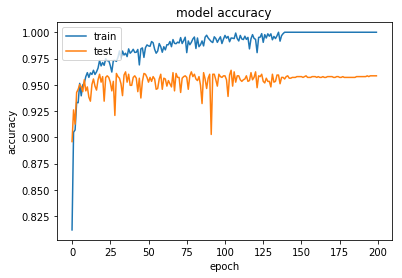

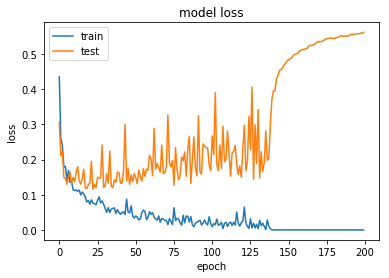

In [13]:
# trénování modelu
history, model = train_model(x_train, y_train, 200, 32, 'adam')

In [9]:
# vytvoření modelu jako obrázku
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
plot_model(model, to_file='model_plot_5_layers_pyramid.png', show_shapes=True, show_layer_names=True)

In [10]:
# odstranit stávající model
del model

In [72]:
# načtení uloženého modelu
model = load_model('nn_deep_5_sgd_pyramid_200e.h5')

In [6]:
# metoda pro udělání predikce na testovacím souboru
def prediction_test(model, x_test, y_test):
    
    test_predictions = model.predict(x_test)
    test_predictions = np.round(test_predictions)

    # vrácení přesnosti
    accuracy = accuracy_score(y_test, test_predictions)
    print("Přesnost testovacího setu: " + str(accuracy * 100) + "%")
    
    return test_predictions

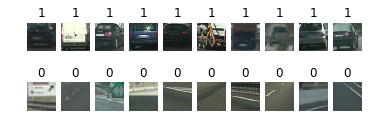

In [11]:
# zobrazení testovacích dat
visualize_examples(x_test, y_test, 10)

In [73]:
# predikce testovacího souboru
test_predictions = prediction_test(model, x_test, y_test)

Přesnost testovacího setu: 97.14285714285714%


počet špatných odhadů: 20


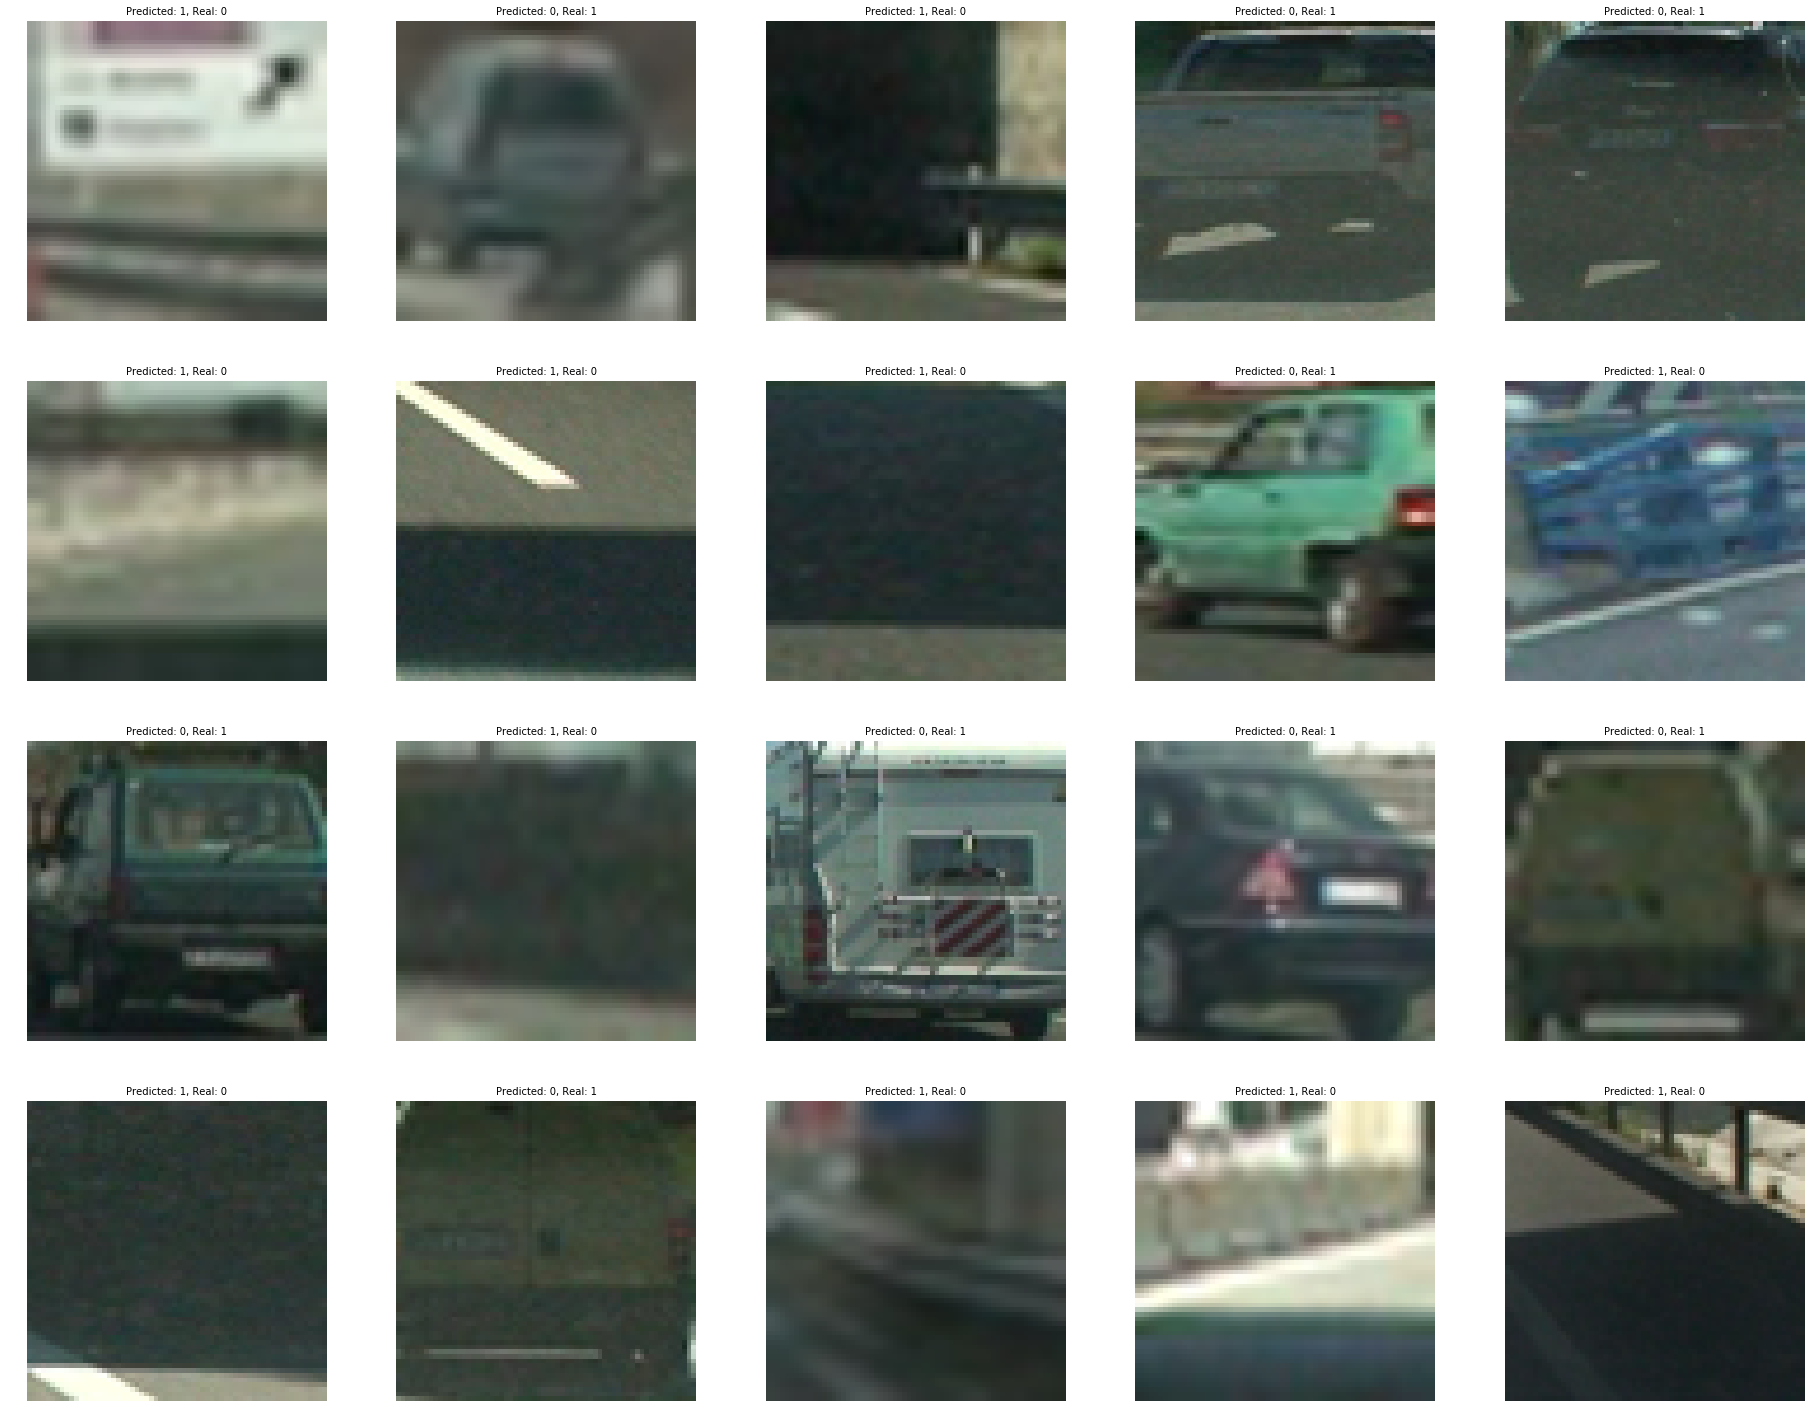

In [74]:
# zobrazení nesprávně označených obrázků
visualize_incorrect_labels(x_test, y_test, np.asarray(test_predictions).ravel())